In [1]:
import numpy as np
import pandas as pd 
df=pd.read_csv("dataset1.csv")
df_backup=pd.read_csv("dataset1.csv")
df.head()

,Area,Location,Rooms,Gymnasium,LiftAvailable,CarParking,24x7Security,ChildrensPlayArea,Clubhouse,Intercom,LandscapedGardens,IndoorGames,GasConnection,JoggingTrack,SwimmingPool,Price
0,720,Kharghar,1,0,1,1,1,0,0,0,0,0,0,0,0,4850000
1,600,Kharghar,1,1,1,1,1,0,1,0,0,0,0,1,1,4500000
2,650,Kharghar,1,1,1,1,1,1,1,1,0,0,0,1,1,6700000
3,650,Kharghar,1,0,1,1,1,0,0,1,1,0,0,0,0,4500000
4,665,Kharghar,1,0,1,1,1,0,0,1,1,0,0,0,0,5000000


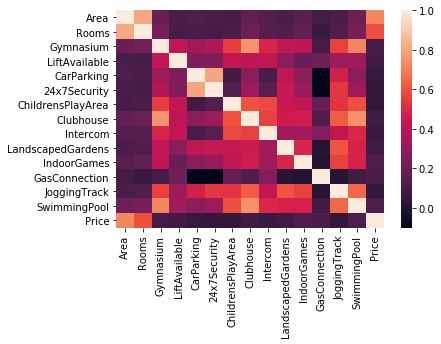

In [2]:
import seaborn as sns 
sns.heatmap(df.corr())

0.36365282121612025

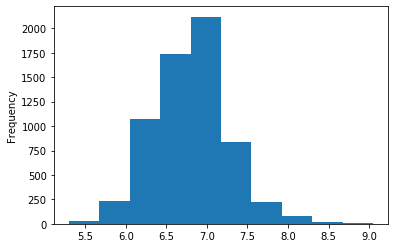

In [3]:
df['Area']=np.log(df['Area'])
df["Area"].plot.hist()
df['Area'].skew()

0.41005638333143235

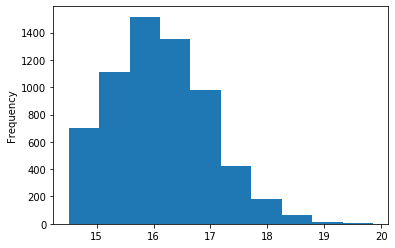

In [4]:
df["Price"]=np.log(df["Price"])
df["Price"].plot.hist()
df["Price"].skew()

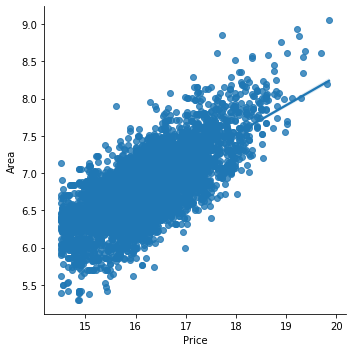

In [5]:
sns.lmplot(x="Price",y="Area",data=df)

In [6]:
df['Location'].value_counts().sort_values(ascending=False).head(92)

Kharghar              533
Thane West            418
Mira Road East        390
Ulwe                  319
Borivali West         176
                     ... 
Palghar                11
Kurla West             11
Sector 19 Kharghar     10
Sion                   10
Majiwada               10
Name: Location, Length: 92, dtype: int64

In [7]:
top_92 = [x for x in df['Location'].value_counts().sort_values(ascending=False).head(92).index]
len(top_92)

92

In [8]:
for label in top_92:
    df[label]=np.where(df['Location']==label,1,0)
df1=df[['Location']+top_92]

In [9]:
df1=df1.drop(['Location'],axis=1)
df1.head()

,Kharghar,Thane West,Mira Road East,Ulwe,Borivali West,Kalyan West,Nala Sopara,Malad West,Andheri West,Powai,...,Wadala East Wadala,Ghatkopar,Vashi,Matunga East,Kalyan East,Palghar,Kurla West,Sector 19 Kharghar,Sion,Majiwada
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df_backup["Price"]=np.log(df_backup["Price"])
df_backup['Area']=np.log(df_backup['Area'])
df_backup=df_backup.drop(['Location'],axis=1)
df_backup.head()

,Area,Rooms,Gymnasium,LiftAvailable,CarParking,24x7Security,ChildrensPlayArea,Clubhouse,Intercom,LandscapedGardens,IndoorGames,GasConnection,JoggingTrack,SwimmingPool,Price
0,6.579251,1,0,1,1,1,0,0,0,0,0,0,0,0,15.394489
1,6.396930,1,1,1,1,1,0,1,0,0,0,0,1,1,15.319588
2,6.476972,1,1,1,1,1,1,1,1,0,0,0,1,1,15.717618
3,6.476972,1,0,1,1,1,0,0,1,1,0,0,0,0,15.319588
4,6.499787,1,0,1,1,1,0,0,1,1,0,0,0,0,15.424948


In [11]:
df2=pd.concat([df1,df_backup],axis=1)

In [12]:
df2.head()

,Kharghar,Thane West,Mira Road East,Ulwe,Borivali West,Kalyan West,Nala Sopara,Malad West,Andheri West,Powai,...,24x7Security,ChildrensPlayArea,Clubhouse,Intercom,LandscapedGardens,IndoorGames,GasConnection,JoggingTrack,SwimmingPool,Price
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,15.394489
1,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,15.319588
2,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,1,1,15.717618
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,15.319588
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,15.424948


In [13]:
X=df2.drop(["Price"],axis=1)
X.head()

,Kharghar,Thane West,Mira Road East,Ulwe,Borivali West,Kalyan West,Nala Sopara,Malad West,Andheri West,Powai,...,CarParking,24x7Security,ChildrensPlayArea,Clubhouse,Intercom,LandscapedGardens,IndoorGames,GasConnection,JoggingTrack,SwimmingPool
0,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,1,1
2,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,0,1,1
3,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,1,0,0,0,0


In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)

,Kharghar,Thane West,Mira Road East,Ulwe,Borivali West,Kalyan West,Nala Sopara,Malad West,Andheri West,Powai,...,CarParking,24x7Security,ChildrensPlayArea,Clubhouse,Intercom,LandscapedGardens,IndoorGames,GasConnection,JoggingTrack,SwimmingPool
0,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,1,1
2,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,0,1,1
3,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,1,0,0,0,0


In [25]:
X['Area'].head(10)

0    6.579251
1    6.396930
2    6.476972
3    6.476972
4    6.499787
5    7.600902
6    7.346010
7    7.222566
8    7.212294
9    7.426549
Name: Area, dtype: float64

In [15]:
Y=df2["Price"]
Y.head()

0    15.394489
1    15.319588
2    15.717618
3    15.319588
4    15.424948
Name: Price, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_pred=model.predict(X_test)

In [19]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,y_pred)

In [20]:
score

0.8500739335657258